<a href="https://colab.research.google.com/github/DDiekmann/Applied-Verification-Lab-Neural-Networks/blob/main/Tutorials/Planet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Planet
[Github Repository](https://github.com/progirep/planet)

In [1]:
%%capture

# Clone the repo
!git clone https://github.com/progirep/planet.git

In [2]:
%%capture
# we need a script to convert the neural network description in to the "prototxt" format (produced by Caffe) into a json file
!cd tools
!wget https://gist.github.com/progirep/fd7d2dc120862faa984a70f503611013/raw/260e1e76cebd0ea58bf1a03b64c3f1e0002fc677/csv_to_hdf5_supervised_classification.py 

# we need a second script to generate a database in "HDF5" format from comma-separated value files
!wget https://raw.githubusercontent.com/vadimkantorov/caffemodel2json/3a8fd443bf1596dad5f517aecdef08a81bf73bfe/caffemodel2json.py

In [3]:
%%capture

# install packages in order to build PLANET
!sudo apt-get install libglpk-dev
!sudo apt-get install qt5-qmake
!sudo apt-get install valgrind
!sudo apt-get install libltdl-dev
!sudo apt-get install protobuf-compiler

In [4]:
%%capture

# compile the source code
%cd planet/src
%ls
!qmake Tool.pro
!make

# Install Caffe - Currently not working

Following [this tutorial](https://colab.research.google.com/github/Huxwell/caffe-colab/blob/main/caffe_details.ipynb). Caution: this takes 5 minutes.

In [ ]:
# Caffe currently doesnt work!!!!!!

%%capture

# install Caffe and Yices
# change root path of #CAFFE and #YICES
!sudo apt install caffe-cuda
!sudo add-apt-repository ppa:sri-csl/formal-methods -qq
!sudo apt-get update
!sudo apt-get install yices2

In [5]:
%cd /content/
!git clone https://github.com/BVLC/caffe.git

/content
Cloning into 'caffe'...
remote: Enumerating objects: 65274, done.
remote: Total 65274 (delta 0), reused 0 (delta 0), pack-reused 65274
Receiving objects: 100% (65274/65274), 74.14 MiB | 14.31 MiB/s, done.
Resolving deltas: 100% (41245/41245), done.


In [6]:
%%capture 
!sudo apt-get install libgflags2.2 
!sudo apt-get install libgflags-dev
!sudo apt-get install libgoogle-glog-dev
!sudo apt-get install libhdf5-100
!sudo apt-get install libhdf5-serial-dev
!sudo apt-get install libhdf5-dev
!sudo apt-get install libhdf5-cpp-100
!sudo apt-get install libprotobuf-dev protobuf-compiler

In [7]:
!find /usr -iname "*hdf5.so"
# got: /usr/lib/x86_64-linux-gnu/hdf5/serial
!find /usr -iname "*hdf5_hl.so"

/usr/lib/x86_64-linux-gnu/hdf5/serial/libhdf5.so
/usr/lib/x86_64-linux-gnu/hdf5/serial/libhdf5_hl.so


In [8]:
!ln -s /usr/lib/x86_64-linux-gnu/libhdf5_serial.so /usr/lib/x86_64-linux-gnu/libhdf5.so
!ln -s /usr/lib/x86_64-linux-gnu/libhdf5_serial_hl.so /usr/lib/x86_64-linux-gnu/libhdf5_hl.so

In [9]:
#!find /usr -iname "*hdf5.h*" # got:
# /usr/include/hdf5/serial/hdf5.h 
# /usr/include/opencv2/flann/hdf5.h
# Let's try the first one.
%env CPATH="/usr/include/hdf5/serial/"
#fatal error: hdf5.h: No such file or directory

env: CPATH="/usr/include/hdf5/serial/"


In [10]:
%%capture
!sudo apt-get install libleveldb-dev
!sudo apt-get install libgflags-dev libgoogle-glog-dev liblmdb-dev
!sudo apt-get install libsnappy-dev

Build caffe from source files.

In [11]:
!echo $CPATH

"/usr/include/hdf5/serial/"


In [12]:
%cd caffe

!ls
!make clean
!cp Makefile.config.example Makefile.config

/content/caffe
caffe.cloc	 data	   INSTALL.md		    models     tools
cmake		 docker    LICENSE		    python
CMakeLists.txt	 docs	   Makefile		    README.md
CONTRIBUTING.md  examples  Makefile.config.example  scripts
CONTRIBUTORS.md  include   matlab		    src
Makefile:6: *** Makefile.config not found. See Makefile.config.example..  Stop.


In [13]:
!sed -i 's/-gencode arch=compute_20/#-gencode arch=compute_20/' Makefile.config #old cuda versions won't compile 
!sed -i 's/\/usr\/local\/include/\/usr\/local\/include \/usr\/include\/hdf5\/serial\//'  Makefile.config #one of the 4 things needed to fix hdf5 issues
!sed -i 's/# OPENCV_VERSION := 3/OPENCV_VERSION := 3/' Makefile.config #We actually use opencv 4.1.2, but it's similar enough to opencv 3.
!sed -i 's/code=compute_61/code=compute_61 -gencode=arch=compute_70,code=sm_70 -gencode=arch=compute_75,code=sm_75 -gencode=arch=compute_75,code=compute_75/' Makefile.config #support for new GPUs

In [14]:
!make all -j 4 # -j would use all availiable cores, but RAM related errors occur

PROTOC src/caffe/proto/caffe.proto
NVCC src/caffe/layers/log_layer.cu
NVCC src/caffe/util/math_functions.cu
NVCC src/caffe/util/im2col.cu
NVCC src/caffe/layers/power_layer.cu
In file included from src/caffe/util/math_functions.cu:1:0:
/usr/local/cuda/include/math_functions.h:54:2: warning: #warning "math_functions.h is an internal header file and must not be used directly.  This file will be removed in a future CUDA release.  Please use cuda_runtime_api.h or cuda_runtime.h instead." [-Wcpp]
 #warning "math_functions.h is an internal header file and must not be used directly.  This file will be removed in a future CUDA release.  Please use cuda_runtime_api.h or cuda_runtime.h instead."
  ^~~~~~~
In file included from src/caffe/util/math_functions.cu:1:0:
/usr/local/cuda/include/math_functions.h:54:2: warning: #warning "math_functions.h is an internal header file and must not be used directly.  This file will be removed in a future CUDA release.  Please use cuda_runtime_api.h or cuda_run

In [15]:
!find / -iname "*caffe*"

/usr/local/lib/python3.7/dist-packages/torch/onnx/symbolic_caffe2.py
/usr/local/lib/python3.7/dist-packages/torch/onnx/__pycache__/symbolic_caffe2.cpython-37.pyc
/usr/local/lib/python3.7/dist-packages/torch/utils/tensorboard/_caffe2_graph.py
/usr/local/lib/python3.7/dist-packages/torch/utils/tensorboard/__pycache__/_caffe2_graph.cpython-37.pyc
/usr/local/lib/python3.7/dist-packages/torch/share/cmake/Caffe2
/usr/local/lib/python3.7/dist-packages/torch/share/cmake/Caffe2/Caffe2ConfigVersion.cmake
/usr/local/lib/python3.7/dist-packages/torch/share/cmake/Caffe2/Caffe2Targets.cmake
/usr/local/lib/python3.7/dist-packages/torch/share/cmake/Caffe2/Caffe2Config.cmake
/usr/local/lib/python3.7/dist-packages/torch/share/cmake/Caffe2/Caffe2Targets-release.cmake
/usr/local/lib/python3.7/dist-packages/torch/lib/libcaffe2_nvrtc.so
/usr/local/lib/python3.7/dist-packages/torch/include/caffe2
/usr/local/lib/python3.7/dist-packages/torch/include/caffe2/core/export_caffe2_op_to_c10.h
/usr/local/lib/python3

# Train Caffe model on MNIST

In [16]:
# downloads mnist dataset

%cd /content/caffe/

!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz
!cp -rv MNIST/raw/* data/mnist/

/content/caffe
--2022-06-22 08:42:58--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2022-06-22 08:42:58--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz            [               <=>  ]  33.20M  8.63MB/s    in 4.4s    

2022-06-22 08:43:03 (7.52 MB/s) - ‘MNIST.tar.gz’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyt

In [17]:
# creates mnist_test_lmdb and mnist_train_lmdb

!/content/caffe/examples/mnist/create_mnist.sh

Creating lmdb...
I0622 08:43:07.853860  4789 db_lmdb.cpp:35] Opened lmdb examples/mnist/mnist_train_lmdb
I0622 08:43:07.854115  4789 convert_mnist_data.cpp:88] A total of 60000 items.
I0622 08:43:07.854122  4789 convert_mnist_data.cpp:89] Rows: 28 Cols: 28
I0622 08:43:08.573644  4789 convert_mnist_data.cpp:108] Processed 60000 files.
I0622 08:43:09.721743  4793 db_lmdb.cpp:35] Opened lmdb examples/mnist/mnist_test_lmdb
I0622 08:43:09.722028  4793 convert_mnist_data.cpp:88] A total of 10000 items.
I0622 08:43:09.722034  4793 convert_mnist_data.cpp:89] Rows: 28 Cols: 28
I0622 08:43:09.839326  4793 convert_mnist_data.cpp:108] Processed 10000 files.
Done.


In [18]:
# copy lmdbs to planet folder

%cp -a /content/caffe/examples/mnist/mnist_test_lmdb /content/planet/casestudies/MNIST/
%cp -a /content/caffe/examples/mnist/mnist_train_lmdb /content/planet/casestudies/MNIST/

In [ ]:
%cd /content/planet/casestudies/MNIST/

# change iterations from 200k to 50k
!sed -i 's/200000/50000/g' /content/planet/casestudies/MNIST/lenet_solver.prototxt

# remove snapshots
!sed -i 's/snapshot:/#snapshot:/g' /content/planet/casestudies/MNIST/lenet_solver.prototxt
!sed -i 's/snapshot_prefix:/#snapshot_prefix:/g' /content/planet/casestudies/MNIST/lenet_solver.prototxt

# train the model
!/content/caffe/build/tools/caffe train --solver=/content/planet/casestudies/MNIST/lenet_solver.prototxt $@

done: training of the model

result: lenet_iter_50000.caffemodel and lenet_iter_50000.solverstate

next step: convert caffemodel file to .rlv so PLANET can verify it


# Convert Caffe to JSON

In [ ]:
%cd /content/caffe/
!make pycaffe
!make distribute

In [ ]:
%env CAFFE_ROOT=/content/caffe
%env PYTHONPATH=/content/caffe/python:$PYTHONPATH

In [ ]:
import os
import sys
import json
import requests
import argparse
import tempfile
import subprocess
from google.protobuf.descriptor import FieldDescriptor as FD

# inspired by https://github.com/dpp-name/protobuf-json/blob/master/protobuf_json.py
def pb2json(pb, print_arrays):
	_ftype2js = {
		FD.TYPE_DOUBLE: float,
		FD.TYPE_FLOAT: float,
		FD.TYPE_INT64: long,
		FD.TYPE_UINT64: long,
		FD.TYPE_INT32: int,
		FD.TYPE_FIXED64: float,
		FD.TYPE_FIXED32: float,
		FD.TYPE_BOOL: bool,
		FD.TYPE_STRING: unicode,
		FD.TYPE_BYTES: lambda x: x.encode('string_escape'),
		FD.TYPE_UINT32: int,
		FD.TYPE_ENUM: int,
		FD.TYPE_SFIXED32: float,
		FD.TYPE_SFIXED64: float,
		FD.TYPE_SINT32: int,
		FD.TYPE_SINT64: long,
		FD.TYPE_MESSAGE: lambda x: pb2json(x, print_arrays = print_arrays),
		'unknown' : lambda x: 'Unknown field type: %s' % x
	}
	js = {}
	for field, value in pb.ListFields():
		ftype = _ftype2js[field.type] if field.type in _ftype2js else _ftype2js['unknown']
		if field.label == FD.LABEL_REPEATED:
			js_value = map(ftype, value)
			if not print_arrays and (field.name == 'data' and len(js_value) > 8):
				head_n = 5
				js_value = js_value[:head_n] + ['(%d elements more)' % (len(js_value) - head_n)]
		else:
			js_value = ftype(value)
		js[field.name] = js_value
	return js

from caffe import *

caffemodel_file = '/content/planet/casestudies/MNIST/lenet_solver_iter_50000.caffemodel'

deserialized = caffe_pb2.NetParameter()
deserialized.ParseFromString(open(caffemodel_file, 'rb').read())

json.dump(pb2json(deserialized, args.data), sys.stdout, indent = 2)


## Caffe to JSON converter in Python3
### TODO caffe doesnt work in python currently



In [ ]:
import os
import sys
import json
import argparse
import tempfile
import subprocess
from google.protobuf.descriptor import FieldDescriptor as FD

# inspired by https://github.com/dpp-name/protobuf-json/blob/master/protobuf_json.py
def pb2json(pb, print_arrays):
	_ftype2js = {
        FD.TYPE_DOUBLE: float,
		FD.TYPE_FLOAT: float,
		FD.TYPE_INT64: int,
		FD.TYPE_UINT64: int,
		FD.TYPE_INT32: int,
		FD.TYPE_FIXED64: float,
		FD.TYPE_FIXED32: float,
		FD.TYPE_BOOL: bool,
		FD.TYPE_STRING: str,
		FD.TYPE_BYTES: lambda x: x.encode('string_escape'),
		FD.TYPE_UINT32: int,
		FD.TYPE_ENUM: int,
		FD.TYPE_SFIXED32: float,
		FD.TYPE_SFIXED64: float,
		FD.TYPE_SINT32: int,
		FD.TYPE_SINT64: int,
		FD.TYPE_MESSAGE: lambda x: pb2json(x, print_arrays = print_arrays),
		'unknown' : lambda x: 'Unknown field type: %s' % x
	}
	js = {}
	for field, value in pb.ListFields():
		ftype = _ftype2js[field.type] if field.type in _ftype2js else _ftype2js['unknown']
		if field.label == FD.LABEL_REPEATED:
			js_value = list(map(ftype, value))
			if not print_arrays and (field.name == 'data' and len(js_value) > 8):
				head_n = 5
				js_value = js_value[:head_n] + ['(%d elements more)' % (len(js_value) - head_n)]
		else:
			js_value = ftype(value)
		js[field.name] = js_value
	return js

from caffe.proto import caffe_pb2

caffe_file = "lenet_solver_iter_50000.caffemodel"

deserialized = caffe_pb2.NetParameter()
deserialized.ParseFromString(open(caffe_file, 'rb').read())

# print(deserialized)
# json dump to console
json.dump(pb2json(deserialized, "store_true"), sys.stdout, indent = 2)

# json dump to file
with open("caffemodel_mnist.json", "w") as f:
    json.dump(pb2json(deserialized, "store_true"), f, indent = 2)

## JSON to RLV converter in Python3

In [ ]:
%%capture cap --no-stderr
with open('output.rlv', 'w') as f:
    f.write(cap.stdout)

import os, sys
import json
# import operator
from functools import reduce
from pprint import pprint

# Read input file
if len(sys.argv) < 2:
    print(sys.stderr, "Error: Expected JSON input file name!")

"""
with open(sys.argv[1]) as data_file:    
    data = json.load(data_file)
"""

with open("caffemodel_mnist.json") as data_file:    
    data = json.load(data_file)

data = data["layer"]

# Neuron lookup table: layer--->Neuron names
neurons = {}


# Function for recursively processing layers
def recurseProcessLayer(dataLineName,dataLineWidth):
    '''Returns the neuron names. DataLineWidth may be unknown.'''

    # DAG Caching
    if dataLineName in neurons:
        return neurons[dataLineName]
        
    # Search for the producer of this layer
    for layer in data:
        if dataLineName in layer["top"]:

            # This is the layer to be processed
            # ---> Proceed according to type.
            if layer["type"]=="Split":
                assert len(layer["bottom"])==1
                return recurseProcessLayer(layer["bottom"][0],dataLineWidth)
            elif layer["type"]=="InnerProduct":
                
                # Get output dimension
                outputLineWidth = layer["inner_product_param"]["num_output"]
                if dataLineWidth!=None:
                    assert outputLineWidth==dataLineWidth
                
                # Now get input dimension and blob data
                inputLineWidth = None
                biasWeights = None
                inputWeights = None
                for blob in layer["blobs"]:
                    if len(blob["shape"]["dim"])==1:
                        biasWeights = blob["data"]
                    elif len(blob["shape"]["dim"])==2:
                        inputLineWidth = blob["shape"]["dim"][1]
                        inputWeights = blob["data"]
                        assert blob["shape"]["dim"][0]==outputLineWidth
                    else:
                        assert False
                assert inputLineWidth != None
                
                # Now get input
                assert len(layer["bottom"])==1
                inputNeurons = recurseProcessLayer(layer["bottom"][0],inputLineWidth)
                
                # Produce outputs
                outputNeurons = []
                for i in range(0,outputLineWidth):
                    outputNeurons.append(dataLineName+"X"+str(i))
                    sys.stdout.write("Linear "+dataLineName+"X"+str(i)+" "+str(biasWeights[i]))
                    for j in range(0,len(inputNeurons)):
                        sys.stdout.write(" "+str(inputWeights[i*inputLineWidth+j])+" "+str(inputNeurons[j]))
                    sys.stdout.write("\n")
                
                neurons[dataLineName] = outputNeurons
                return outputNeurons
                
                
            elif layer["type"]=="ReLU":
            
                # RELU: Get Input
                assert len(layer["bottom"])==1
                inputNeurons = recurseProcessLayer(layer["bottom"][0],dataLineWidth)
                
                # Produce outputs
                outputNeurons = []
                for i in range(0,len(inputNeurons)):
                    outputNeurons.append(dataLineName+"X"+str(i))
                    sys.stdout.write("ReLU "+dataLineName+"X"+str(i)+" 0.0 1.0 "+str(inputNeurons[i])+"\n")
                
                neurons[dataLineName] = outputNeurons
                return outputNeurons
                
                
                
            elif layer["type"]=="Convolution":
                
                # Convolution
                
                # ---> Load weights and biasses
                dimWeights = None
                weights = None
                biasses = None
                for blob in layer["blobs"]:
                    size = blob["shape"]["dim"]
                    params = blob["data"]
                    if len(size)==1:
                        biasses = params
                    else:
                        dimWeights = size
                        weights = params
                        
                # ---> Other parameters
                #--------> Read Stride
                if "stride" in layer["convolution_param"]:
                    stride = layer["convolution_param"]["stride"]
                    assert len(stride)==1
                    stride = stride + stride
                else:
                    if "stride_w" in layer["convolution_param"]:
                        if "stride_h" in layer["convolution_param"]:
                            stride = [layer["convolution_param"]["stride_w"],layer["convolution_param"]["stride_h"]]
                        else:
                            stride = [layer["convolution_param"]["stride_w"],1]
                    else:
                        if "stride_h" in layer["convolution_param"]:
                            stride = [1,layer["convolution_param"]["stride_h"]]
                        else:
                            stride = [1,1]
                
                #--------> Read Kernel Size
                if "kernel_size" in layer["convolution_param"]:
                    kernel_size = layer["convolution_param"]["kernel_size"]
                    assert len(kernel_size)==1
                    kernel_size = kernel_size + kernel_size
                else:
                    kernel_size = [layer["convolution_param"]["kernel_w"],layer["convolution_param"]["kernel_h"]]

                #--------> Read PAD
                if "pad" in layer["convolution_param"]:
                    padding = layer["convolution_param"]["pad"]
                    assert len(padding)==1
                    padding = padding + padding
                else:
                    if "pad_w" in layer["convolution_param"]:
                        if "pad_h" in layer["convolution_param"]:
                            padding = [layer["convolution_param"]["pad_w"],layer["convolution_param"]["pad_h"]]
                        else:
                            padding = [layer["convolution_param"]["pad_w"],0]
                    else:
                        if "pad_h" in layer["convolution_param"]:
                            padding = [0,layer["convolution_param"]["pad_h"]]
                        else:
                            padding = [0,0]

                num_output = layer["convolution_param"]["num_output"]
                num_input_channels = dimWeights[1]
                
                # Rest is unimplemented for the time being.
                # assert dimWeights[0]==1 #---> This is for the *outgoing* num_outputs
                # assert dimWeights[1]==1 #----> This is for the incoming colors or features
                
                # Check for some unsupported features
                if "bias_term" in layer["convolution_param"]:
                    print(sys.stderr, "Error: Only the default 'bias_term' value is supported for convolution layers")
                    sys.exit(1)

                if "group" in layer["convolution_param"]:
                    print(sys.stderr, "Error: Only the default 'group' value is supported for convolution layers")
                    sys.exit(1)
                
                # ---> Read input
                inputNeurons = recurseProcessLayer(layer["bottom"][0],None)
                
                # ---> Unflatten weights
                def unflatten(neurons,remainingDimensions):
                    if len(remainingDimensions)==1:
                        return (neurons[0:remainingDimensions[0]],neurons[remainingDimensions[0]:])
                    else:
                        res = []
                        for a in range(0,remainingDimensions[0]):
                            (d,neurons) = unflatten(neurons,remainingDimensions[1:])
                            res.append(d)
                        return (res,neurons)
                
                (unflattenedWeights,rest) = unflatten(weights,dimWeights)
                assert rest==[]
                
                # Compute convolution
                resultingNeurons = []
                for i in range(0,num_output):
                    ysize = len(inputNeurons[0])
                    xsize = len(inputNeurons[0][0])
                    thisBlock = []
                    for y in range(-1*padding[1],ysize-kernel_size[1]+1+padding[1],stride[1]):
                        thisLine = []                    
                        for x in range(-1*padding[0],xsize-kernel_size[0]+1+padding[0],stride[0]):
                            thisLine.append(dataLineName+"X"+str(i)+"X"+str(x)+"X"+str(y))
                            localInputs = []
                            for c in range(0,num_input_channels):
                                for b in range(0,kernel_size[1]):
                                    for a in range(0,kernel_size[0]):
                                        if y+b>=0 and y+b<len(inputNeurons[c]):
                                            if x+a>=0 and x+a<len(inputNeurons[c][y+b]):
                                                localInputs.append(str(unflattenedWeights[i][c][b][a])+" "+inputNeurons[c][y+b][x+a]) 
                            sys.stdout.write("Linear "+thisLine[-1]+" "+str(biasses[i])+" "+" ".join(localInputs)+"\n")
                        thisBlock.append(thisLine)
                    resultingNeurons.append(thisBlock)
                    
                return resultingNeurons

            elif layer["type"]=="HDF5Data":
            
                # Input layer
                assert dataLineWidth!=None
                
                outputNeurons = []
                for i in range(0,dataLineWidth):
                    outputNeurons.append("inX"+str(i))
                    sys.stdout.write("Input inX"+str(i)+"\n")

                neurons[dataLineName] = outputNeurons
                return outputNeurons
                
            elif layer["type"]=="Data":
            
                # Input layer
                assert dataLineWidth!=None
                
                # We assume normalization by a factor of 1/256.0 here.
                assert layer['transform_param']['scale'] == 0.00390625

                outputNeurons = []
                for i in range(0,dataLineWidth):
                    outputNeurons.append("inX"+str(i))
                    sys.stdout.write("Input inX"+str(i)+"\n")

                neurons[dataLineName] = outputNeurons
                return outputNeurons
                
            elif layer["type"]=="Reshape":
            
                # Reshape layer
                outputDimension = layer['reshape_param']['shape']['dim']
                # print layer
                assert outputDimension[0]==-1 # The first dimension is always the sample points
                
                nofInputs = 1
                for a in outputDimension[1:]:
                    nofInputs *= a
                inputNeurons = recurseProcessLayer(layer["bottom"][0],nofInputs)

                
                # Ok, first flatten input Neurons
                def flat(neurons):
                    if type(neurons)==str or type(neurons)==str:
                        return [neurons]
                    else:
                        l = []
                        for a in neurons:
                            l.extend(flat(a))
                        return l
                
                # Ok, first flatten input Neurons
                #def flat(neurons):
                #    if type(neurons)==str or type(neurons)==unicode or type(neurons)==int:
                #        return [neurons]
                #    else:
                #        l = []
                #        for a in neurons:
                #            l.append(flat(a))
                #        return [a for j in zip(*l) for a in j ]

                flattenedNeurons = flat(inputNeurons)
                
                # Ok, now reshape
                def unflatten(neurons,remainingDimensions):
                    if len(remainingDimensions)==1:
                        return (neurons[0:remainingDimensions[0]],neurons[remainingDimensions[0]:])
                    else:
                        res = []
                        for a in range(0,remainingDimensions[0]):
                            (d,neurons) = unflatten(neurons,remainingDimensions[1:])
                            res.append(d)
                        return (res,neurons)
                
                # Ok, now reshape
                #def unflatten(neurons,selection,dimensions):
                #    if len(selection)==len(dimensions):
                #        index = 0
                #        factor = 1
                #        for i in range(0,len(selection)):
                #            index += factor*selection[i]
                #            factor *= dimensions[i]
                #        return neurons[index]
                #    else:
                #        res = []
                #        for a in range(0,dimensions[len(selection)]):
                #            res.append(unflatten(neurons,selection+[a],dimensions))
                #        return res

                
                (unflattenedNeurons,rest) = unflatten(flattenedNeurons,outputDimension[1:])
                assert rest==[]
                # print outputDimension
                # print inputNeurons
                # print flattenedNeurons
                # print "-----UF:->",unflattenedNeurons
                assert len(flattenedNeurons)==reduce(operator.mul, outputDimension[1:], 1)
                              
                return unflattenedNeurons

            elif layer["type"]=="Pooling":
            
                # Reshape layer
                inputNeurons = recurseProcessLayer(layer["bottom"][0],None)
                
                assert layer["pooling_param"]["pool"]==0 # Must be a MAXPOOL (for the time being)
                
                # ---> Other parameters
                #--------> Read Stride
                if "stride" in layer["pooling_param"]:
                    # Why is the "stride" here an int, but for the Convolution layer is a list?
                    stride = layer["pooling_param"]["stride"]
                    if isinstance(stride,list):
                        assert len(stride)==1
                        stride = stride + stride
                    else:
                        stride = [stride,stride]
                else:
                    if "stride_w" in layer["pooling_param"]:
                        if "stride_h" in layer["pooling_param"]:
                            stride = [layer["pooling_param"]["stride_w"],layer["pooling_param"]["stride_h"]]
                        else:
                            stride = [layer["pooling_param"]["stride_w"],1]
                    else:
                        if "stride_h" in layer["pooling_param"]:
                            stride = [1,layer["pooling_param"]["stride_h"]]
                        else:
                            stride = [1,1]
                
                #--------> Read Kernel Size
                if "kernel_size" in layer["pooling_param"]:
                    # Why is the "kernel_size" here an int, but for the Convolution layer is a list?
                    kernel_size = layer["pooling_param"]["kernel_size"]
                    if isinstance(kernel_size,list):
                        assert len(kernel_size)==1
                        kernel_size = kernel_size + kernel_size
                    else:
                        kernel_size = [kernel_size,kernel_size]
                else:
                    kernel_size = [layer["pooling_param"]["kernel_w"],layer["pooling_param"]["kernel_h"]]

                #--------> Read PAD
                if "pad" in layer["pooling_param"]:
                    padding = layer["pooling_param"]["pad"]
                    assert len(padding)==1
                    padding = padding + padding
                else:
                    if "pad_w" in layer["pooling_param"]:
                        if "pad_h" in layer["pooling_param"]:
                            padding = [layer["pooling_param"]["pad_w"],layer["pooling_param"]["pad_h"]]
                        else:
                            padding = [layer["pooling_param"]["pad_w"],0]
                    else:
                        if "pad_h" in layer["pooling_param"]:
                            padding = [0,layer["pooling_param"]["pad_h"]]
                        else:
                            padding = [0,0]

                
                # Here, we assume that the "inputNeurons" array is three-dimensional:
                # - color channel
                # - X channel
                # - Y channel
                resultingNeurons = []
                for i,channel in enumerate(inputNeurons):
                    ysize = len(channel)
                    xsize = len(channel[0])
                    thisBlock = []
                    for y in range(-1*padding[1],ysize-kernel_size[1]+1+padding[1],stride[1]):
                        thisLine = []                    
                        for x in range(-1*padding[0],xsize-kernel_size[0]+1+padding[0],stride[0]):
                            thisLine.append(dataLineName+"X"+str(i)+"X"+str(x)+"X"+str(y))
                            localInputs = []
                            for b in range(0,kernel_size[1]):
                                for a in range(0,kernel_size[0]):
                                    if y+b>=0 and y+b<len(channel):
                                        if x+a>=0 and x+a<len(channel[y+b]):
                                            localInputs.append(channel[y+b][x+a]) 
                            sys.stdout.write("MaxPool "+thisLine[-1]+" "+" ".join(localInputs)+"\n")
                        thisBlock.append(thisLine)
                    resultingNeurons.append(thisBlock)
                return resultingNeurons                    
                    
            else:
                raise RuntimeError("Unsupported Layer Type: "+layer["type"])
            
    raise "Error: Data Line "+dataLineName+" not found."


# Process the Accuracy layer
foundAccurracyLayer = False
for layer in data:
    if layer['type'] == 'Accuracy':
        foundAccurracyLayer = True
        outputs = recurseProcessLayer(layer["bottom"][0],None)
        for i in range(0,len(outputs)):
            sys.stdout.write("Linear outX"+str(i)+" 0.0 1.0 "+outputs[i]+"\n")
                
if not foundAccurracyLayer:
    print(sys.stderr, "Warning: No 'Accuracy' layer found, hence nothing was translated.")

## Run planet with your RLV file

In [ ]:
# Add contraints on Input Variables for Planet
%cd /content/

with open("output.rlv", "ab") as f:
  for i in range(28*28):
    linebreak = bytes("\n", "utf-8")
    assert_lowerbound = bytes("Assert <= 0.0 1.0 inX" + str(i), "utf-8")
    assert_upperbound = bytes("Assert >= 1.0 1.0 inX" + str(i), "utf-8")

    f.write(linebreak)
    f.write(assert_lowerbound)
    f.write(linebreak)
    f.write(assert_upperbound)

/content


# Verify Robustness with Planet

In [28]:
!pip install python-mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


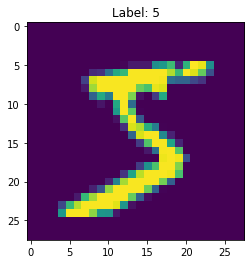

In [41]:
from mnist import MNIST
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

data = MNIST("/content/caffe/data/mnist/")

imgs, labels = data.load_training()

img = np.asarray(imgs[0]).reshape(28, 28)

plt.title("Label: {}".format(labels[0]))
plt.imshow(img)

In [53]:
epsilon = 0.05

def addBounds(i, l_bound, u_bound):
  with open("/content/output.rlv", "ab") as f:
    linebreak = bytes("\n", "utf-8")
    assert_lowerbound = bytes("Assert <= {} 1.0 inX{}".format(l_bound, i), "utf-8")
    assert_upperbound = bytes("Assert >= {} 1.0 inX{}".format(u_bound, i), "utf-8")

    f.write(linebreak)
    f.write(assert_lowerbound)
    f.write(linebreak)
    f.write(assert_upperbound)

counter = 0
for h in range(img.shape[0]):
  for w in range(img.shape[1]):
    lower_bound = img[h][w] - epsilon
    upper_bound = img[h][w] + epsilon
    addBounds(counter, lower_bound, upper_bound)
    counter += 1


In [52]:
!sed -i "/Assert/d" /content/output.rlv
!sed -i "/^$/d" /content/output.rlv 

In [ ]:
#!/content/planet/src/planet /content/caffemodel_mnist.rlv
!/content/planet/src/planet /content/output.rlv

# Current TODO:
The Output Variables are not constrained, we probably need to do that next!